In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tqdm

In [2]:
def heston(N):
    # constant
    s_0=100
    v_0=0.04
    r=0.05
    kappa = 1.3
    theta=0.04
    sigma=0.3
    rho = -0.5
    sigma_1 = -rho*sigma
    sigma_2 = np.sqrt(sigma**2-sigma_1**2)
    T = 1
    K = 100
    n = 10000
    S = [s_0]
    V = [v_0]
    
    S_sec = [s_0]
    V_sec = [v_0]
    dt = T/N
    res_Euler = []
    res_Sec = []
    for i in range(n):
        
        S = [s_0]
        V = [v_0]
        S_sec = [s_0]
        V_sec = [v_0]
        for j in range(N):
            # Euler Discretization Scheme
            Z_1 = np.random.normal(0, 1)
            Z_2 = np.random.normal(0, 1)
            
            S.append(S[-1]+r*S[-1]*dt+np.sqrt(V[-1])*S[-1]*np.sqrt(dt)*Z_1)
            V.append(abs(
                            V[-1]+(kappa*(theta-V[-1]))*dt+ np.sqrt(V[-1])*\
                         (sigma_1*np.sqrt(dt)*Z_1+sigma_2*np.sqrt(dt)*Z_2)
                            ))
            
            
            
            # simplified second order Scheme
            # Resample Z again to avoid dependance 
            Z_1 = np.random.normal(0, 1)
            Z_2 = np.random.normal(0, 1)
            W_1 = np.sqrt(dt)*Z_1
            W_2 = np.sqrt(dt)*Z_2
            
            u = np.random.uniform(0,1)
            if u <= 0.5:
                zeta = dt
            else:
                zeta = -dt
            s_j= S_sec[-1]*(1+r*dt+np.sqrt(V_sec[-1])*W_1)+0.5*(r**2)*S_sec[-1]*(dt**2)\
                    +dt*W_1*(
                                
                    (r+0.25*(sigma_1-kappa))* S_sec[-1]*np.sqrt(V_sec[-1])+\
                (0.25*kappa*theta-sigma**2/16)*S_sec[-1]/np.sqrt(V_sec[-1])

            )+0.5*S_sec[-1]*(V_sec[-1]+0.5*sigma_1)*(W_1**2-dt)+\
            0.25*sigma_2*S_sec[-1]*(W_1*W_2+zeta)

            v_j = kappa*theta*dt+(1-kappa*dt)*V_sec[-1]+\
            np.sqrt(V_sec[-1])*(sigma_1*W_1+sigma_2*W_2)-\
                    0.5*kappa**2*(theta-V_sec[-1])*dt**2 +\
                    ((0.25*kappa*dt-sigma**2/16)/np.sqrt(V_sec[-1])-3/2*kappa*np.sqrt(V_sec[-1]))\
            *(sigma_1*W_1+sigma_2*W_2)*dt+\
                    0.25*sigma_1**2*(W_1**2-dt)+0.25*sigma_2**2*(W_2**2-dt)\
            +0.5*sigma_1*sigma_2*W_1*W_2
            
            S_sec.append(s_j)
            V_sec.append(abs(v_j))
            
            
        #print(res_Euler)
       # print(max(0,S[-1]-K)*np.exp(0-r*T))
            
        res_Euler.append(max(0,S[-1]-K)*np.exp(0-r*T))
        res_Sec.append(max(0,S_sec[-1]-K)*np.exp(0-r*T))
        
    return [np.mean(res_Euler),np.mean(res_Sec)]
    

100%|██████████| 100/100 [43:31<00:00, 26.11s/it]


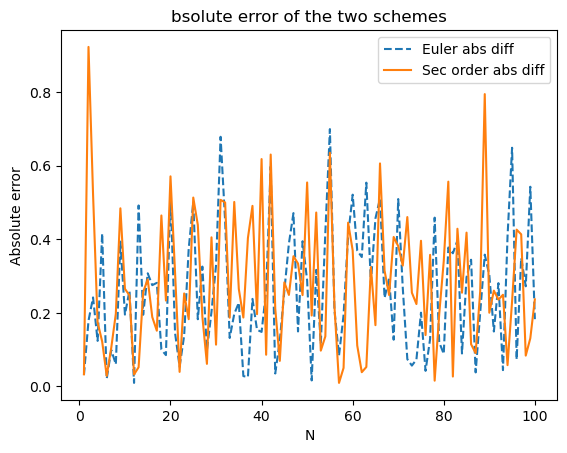

In [ ]:
fair_value = 10.3009
Euler = []
Sec = []
for i in tqdm.tqdm(range(1,101,1)):
    Euler.append(abs(heston(i)[0]-fair_value))
    Sec.append(abs(heston(i)[1]-fair_value))

#df = pd.DataFrame({'Euler':Euler,'Sec':Sec})

# creat a plot with x-asix as N from 1 to 100 and y axis as the difference between 
# the fair value and the estimated value
x= np.arange(1,101,1)
# Creating the plot for y1
plt.plot(x, Euler, label='Euler abs diff', linestyle='--')
# Creating the plot for y2
plt.plot(x, Sec, label='Sec order abs diff')

# Adding title
plt.title('bsolute error of the two schemes')

# Labeling the axes
plt.xlabel('N')
plt.ylabel('Absolute error')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()

# comment:
The graph indicates that as N increases, both the simple Euler and the Simplified Second Order discretization schemes for the Heston model shows a decrease in the absolute error of the European Call Option price estimation. However, beyond this initial improvement, the error does not consistently diminish with more steps and instead shows considerable variability for both methods. Neither scheme consistently outperforms the other across the range of N. And the second order scheme performed much worse than the Euler scheme as N small. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tqdm

In [ ]:
def heston(N):
    # constant
    s_0=100
    v_0=0.04
    r=0.05
    kappa = 1.3
    theta=0.04
    sigma=0.3
    rho = -0.5
    sigma_1 = -rho*sigma
    sigma_2 = np.sqrt(sigma**2-sigma_1**2)
    T = 1
    K = 100
    n = 10000
    S = [s_0]
    V = [v_0]
    
    S_sec = [s_0]
    V_sec = [v_0]
    dt = T/N
    res_Euler = []
    res_Sec = []
    for i in range(n):
        
        S = [s_0]
        V = [v_0]
        S_sec = [s_0]
        V_sec = [v_0]
        for j in range(N):
            # Euler Discretization Scheme
            Z_1 = np.random.normal(0, 1)
            Z_2 = np.random.normal(0, 1)
            
            S.append(S[-1]+r*S[-1]*dt+np.sqrt(V[-1])*S[-1]*np.sqrt(dt)*Z_1)
            V.append(abs(
                            V[-1]+(kappa*(theta-V[-1]))*dt+ np.sqrt(V[-1])*\
                         (sigma_1*np.sqrt(dt)*Z_1+sigma_2*np.sqrt(dt)*Z_2)
                            ))
            
            
            
            # simplified second order Scheme
            # Resample Z again to avoid dependance 
            Z_1 = np.random.normal(0, 1)
            Z_2 = np.random.normal(0, 1)
            W_1 = np.sqrt(dt)*Z_1
            W_2 = np.sqrt(dt)*Z_2
            
            u = np.random.uniform(0,1)
            if u <= 0.5:
                zeta = dt
            else:
                zeta = -dt
            s_j= S_sec[-1]*(1+r*dt+np.sqrt(V_sec[-1])*W_1)+0.5*(r**2)*S_sec[-1]*(dt**2)\
                    +dt*W_1*(
                                
                    (r+0.25*(sigma_1-kappa))* S_sec[-1]*np.sqrt(V_sec[-1])+\
                (0.25*kappa*theta-sigma**2/16)*S_sec[-1]/np.sqrt(V_sec[-1])

            )+0.5*S_sec[-1]*(V_sec[-1]+0.5*sigma_1)*(W_1**2-dt)+\
            0.25*sigma_2*S_sec[-1]*(W_1*W_2+zeta)

            v_j = kappa*theta*dt+(1-kappa*dt)*V_sec[-1]+\
            np.sqrt(V_sec[-1])*(sigma_1*W_1+sigma_2*W_2)-\
                    0.5*kappa**2*(theta-V_sec[-1])*dt**2 +\
                    ((0.25*kappa*dt-sigma**2/16)/np.sqrt(V_sec[-1])-3/2*kappa*np.sqrt(V_sec[-1]))\
            *(sigma_1*W_1+sigma_2*W_2)*dt+\
                    0.25*sigma_1**2*(W_1**2-dt)+0.25*sigma_2**2*(W_2**2-dt)\
            +0.5*sigma_1*sigma_2*W_1*W_2
            
            S_sec.append(s_j)
            V_sec.append(abs(v_j))
            
            
        #print(res_Euler)
       # print(max(0,S[-1]-K)*np.exp(0-r*T))
            
        res_Euler.append(max(0,S[-1]-K)*np.exp(0-r*T))
        res_Sec.append(max(0,S_sec[-1]-K)*np.exp(0-r*T))
        
    return [np.mean(res_Euler),np.mean(res_Sec)]
    

100%|██████████| 100/100 [43:31<00:00, 26.11s/it]


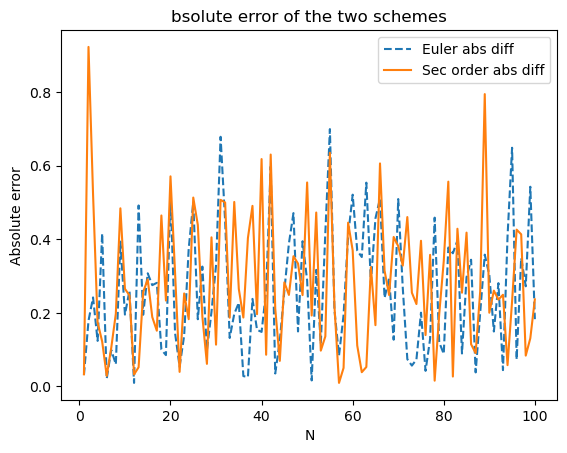

In [ ]:
fair_value = 10.3009
Euler = []
Sec = []
for i in tqdm.tqdm(range(1,101,1)):
    Euler.append(abs(heston(i)[0]-fair_value))
    Sec.append(abs(heston(i)[1]-fair_value))

#df = pd.DataFrame({'Euler':Euler,'Sec':Sec})

# creat a plot with x-asix as N from 1 to 100 and y axis as the difference between 
# the fair value and the estimated value
x= np.arange(1,101,1)
# Creating the plot for y1
plt.plot(x, Euler, label='Euler abs diff', linestyle='--')
# Creating the plot for y2
plt.plot(x, Sec, label='Sec order abs diff')

# Adding title
plt.title('bsolute error of the two schemes')

# Labeling the axes
plt.xlabel('N')
plt.ylabel('Absolute error')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()

# comment:
The graph indicates that as N increases, both the simple Euler and the Simplified Second Order discretization schemes for the Heston model shows a decrease in the absolute error of the European Call Option price estimation. However, beyond this initial improvement, the error does not consistently diminish with more steps and instead shows considerable variability for both methods. Neither scheme consistently outperforms the other across the range of N. And the second order scheme performed much worse than the Euler scheme as N small. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tqdm

In [ ]:
def heston(N):
    # constant
    s_0=100
    v_0=0.04
    r=0.05
    kappa = 1.3
    theta=0.04
    sigma=0.3
    rho = -0.5
    sigma_1 = -rho*sigma
    sigma_2 = np.sqrt(sigma**2-sigma_1**2)
    T = 1
    K = 100
    n = 10000
    S = [s_0]
    V = [v_0]
    
    S_sec = [s_0]
    V_sec = [v_0]
    dt = T/N
    res_Euler = []
    res_Sec = []
    for i in range(n):
        
        S = [s_0]
        V = [v_0]
        S_sec = [s_0]
        V_sec = [v_0]
        for j in range(N):
            # Euler Discretization Scheme
            Z_1 = np.random.normal(0, 1)
            Z_2 = np.random.normal(0, 1)
            
            S.append(S[-1]+r*S[-1]*dt+np.sqrt(V[-1])*S[-1]*np.sqrt(dt)*Z_1)
            V.append(abs(
                            V[-1]+(kappa*(theta-V[-1]))*dt+ np.sqrt(V[-1])*\
                         (sigma_1*np.sqrt(dt)*Z_1+sigma_2*np.sqrt(dt)*Z_2)
                            ))
            
            
            
            # simplified second order Scheme
            # Resample Z again to avoid dependance 
            Z_1 = np.random.normal(0, 1)
            Z_2 = np.random.normal(0, 1)
            W_1 = np.sqrt(dt)*Z_1
            W_2 = np.sqrt(dt)*Z_2
            
            u = np.random.uniform(0,1)
            if u <= 0.5:
                zeta = dt
            else:
                zeta = -dt
            s_j= S_sec[-1]*(1+r*dt+np.sqrt(V_sec[-1])*W_1)+0.5*(r**2)*S_sec[-1]*(dt**2)\
                    +dt*W_1*(
                                
                    (r+0.25*(sigma_1-kappa))* S_sec[-1]*np.sqrt(V_sec[-1])+\
                (0.25*kappa*theta-sigma**2/16)*S_sec[-1]/np.sqrt(V_sec[-1])

            )+0.5*S_sec[-1]*(V_sec[-1]+0.5*sigma_1)*(W_1**2-dt)+\
            0.25*sigma_2*S_sec[-1]*(W_1*W_2+zeta)

            v_j = kappa*theta*dt+(1-kappa*dt)*V_sec[-1]+\
            np.sqrt(V_sec[-1])*(sigma_1*W_1+sigma_2*W_2)-\
                    0.5*kappa**2*(theta-V_sec[-1])*dt**2 +\
                    ((0.25*kappa*dt-sigma**2/16)/np.sqrt(V_sec[-1])-3/2*kappa*np.sqrt(V_sec[-1]))\
            *(sigma_1*W_1+sigma_2*W_2)*dt+\
                    0.25*sigma_1**2*(W_1**2-dt)+0.25*sigma_2**2*(W_2**2-dt)\
            +0.5*sigma_1*sigma_2*W_1*W_2
            
            S_sec.append(s_j)
            V_sec.append(abs(v_j))
            
            
        #print(res_Euler)
       # print(max(0,S[-1]-K)*np.exp(0-r*T))
            
        res_Euler.append(max(0,S[-1]-K)*np.exp(0-r*T))
        res_Sec.append(max(0,S_sec[-1]-K)*np.exp(0-r*T))
        
    return [np.mean(res_Euler),np.mean(res_Sec)]
    

100%|██████████| 100/100 [43:31<00:00, 26.11s/it]


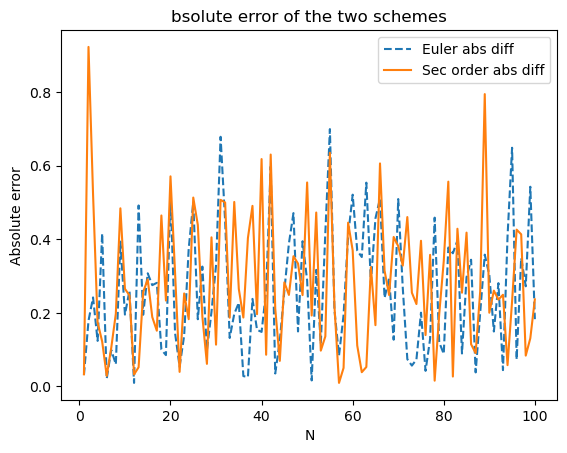

In [ ]:
fair_value = 10.3009
Euler = []
Sec = []
for i in tqdm.tqdm(range(1,101,1)):
    Euler.append(abs(heston(i)[0]-fair_value))
    Sec.append(abs(heston(i)[1]-fair_value))

#df = pd.DataFrame({'Euler':Euler,'Sec':Sec})

# creat a plot with x-asix as N from 1 to 100 and y axis as the difference between 
# the fair value and the estimated value
x= np.arange(1,101,1)
# Creating the plot for y1
plt.plot(x, Euler, label='Euler abs diff', linestyle='--')
# Creating the plot for y2
plt.plot(x, Sec, label='Sec order abs diff')

# Adding title
plt.title('bsolute error of the two schemes')

# Labeling the axes
plt.xlabel('N')
plt.ylabel('Absolute error')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()

# comment:
The graph indicates that as N increases, both the simple Euler and the Simplified Second Order discretization schemes for the Heston model shows a decrease in the absolute error of the European Call Option price estimation. However, beyond this initial improvement, the error does not consistently diminish with more steps and instead shows considerable variability for both methods. Neither scheme consistently outperforms the other across the range of N. And the second order scheme performed much worse than the Euler scheme as N small. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tqdm

In [ ]:
def heston(N):
    # constant
    s_0=100
    v_0=0.04
    r=0.05
    kappa = 1.3
    theta=0.04
    sigma=0.3
    rho = -0.5
    sigma_1 = -rho*sigma
    sigma_2 = np.sqrt(sigma**2-sigma_1**2)
    T = 1
    K = 100
    n = 10000
    S = [s_0]
    V = [v_0]
    
    S_sec = [s_0]
    V_sec = [v_0]
    dt = T/N
    res_Euler = []
    res_Sec = []
    for i in range(n):
        
        S = [s_0]
        V = [v_0]
        S_sec = [s_0]
        V_sec = [v_0]
        for j in range(N):
            # Euler Discretization Scheme
            Z_1 = np.random.normal(0, 1)
            Z_2 = np.random.normal(0, 1)
            
            S.append(S[-1]+r*S[-1]*dt+np.sqrt(V[-1])*S[-1]*np.sqrt(dt)*Z_1)
            V.append(abs(
                            V[-1]+(kappa*(theta-V[-1]))*dt+ np.sqrt(V[-1])*\
                         (sigma_1*np.sqrt(dt)*Z_1+sigma_2*np.sqrt(dt)*Z_2)
                            ))
            
            
            
            # simplified second order Scheme
            # Resample Z again to avoid dependance 
            Z_1 = np.random.normal(0, 1)
            Z_2 = np.random.normal(0, 1)
            W_1 = np.sqrt(dt)*Z_1
            W_2 = np.sqrt(dt)*Z_2
            
            u = np.random.uniform(0,1)
            if u <= 0.5:
                zeta = dt
            else:
                zeta = -dt
            s_j= S_sec[-1]*(1+r*dt+np.sqrt(V_sec[-1])*W_1)+0.5*(r**2)*S_sec[-1]*(dt**2)\
                    +dt*W_1*(
                                
                    (r+0.25*(sigma_1-kappa))* S_sec[-1]*np.sqrt(V_sec[-1])+\
                (0.25*kappa*theta-sigma**2/16)*S_sec[-1]/np.sqrt(V_sec[-1])

            )+0.5*S_sec[-1]*(V_sec[-1]+0.5*sigma_1)*(W_1**2-dt)+\
            0.25*sigma_2*S_sec[-1]*(W_1*W_2+zeta)

            v_j = kappa*theta*dt+(1-kappa*dt)*V_sec[-1]+\
            np.sqrt(V_sec[-1])*(sigma_1*W_1+sigma_2*W_2)-\
                    0.5*kappa**2*(theta-V_sec[-1])*dt**2 +\
                    ((0.25*kappa*dt-sigma**2/16)/np.sqrt(V_sec[-1])-3/2*kappa*np.sqrt(V_sec[-1]))\
            *(sigma_1*W_1+sigma_2*W_2)*dt+\
                    0.25*sigma_1**2*(W_1**2-dt)+0.25*sigma_2**2*(W_2**2-dt)\
            +0.5*sigma_1*sigma_2*W_1*W_2
            
            S_sec.append(s_j)
            V_sec.append(abs(v_j))
            
            
        #print(res_Euler)
       # print(max(0,S[-1]-K)*np.exp(0-r*T))
            
        res_Euler.append(max(0,S[-1]-K)*np.exp(0-r*T))
        res_Sec.append(max(0,S_sec[-1]-K)*np.exp(0-r*T))
        
    return [np.mean(res_Euler),np.mean(res_Sec)]
    

100%|██████████| 100/100 [43:31<00:00, 26.11s/it]


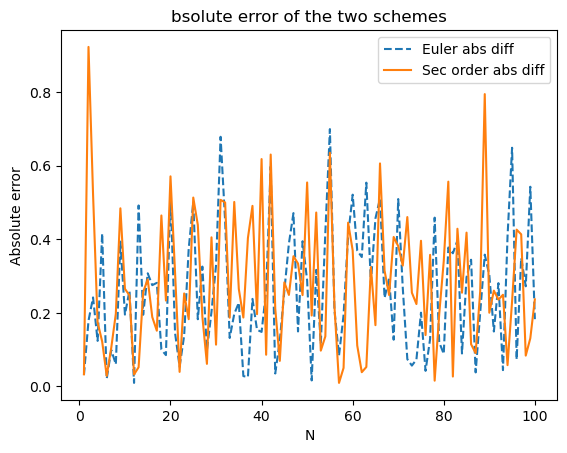

In [ ]:
fair_value = 10.3009
Euler = []
Sec = []
for i in tqdm.tqdm(range(1,101,1)):
    Euler.append(abs(heston(i)[0]-fair_value))
    Sec.append(abs(heston(i)[1]-fair_value))

#df = pd.DataFrame({'Euler':Euler,'Sec':Sec})

# creat a plot with x-asix as N from 1 to 100 and y axis as the difference between 
# the fair value and the estimated value
x= np.arange(1,101,1)
# Creating the plot for y1
plt.plot(x, Euler, label='Euler abs diff', linestyle='--')
# Creating the plot for y2
plt.plot(x, Sec, label='Sec order abs diff')

# Adding title
plt.title('bsolute error of the two schemes')

# Labeling the axes
plt.xlabel('N')
plt.ylabel('Absolute error')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()

# comment:
The graph indicates that as N increases, both the simple Euler and the Simplified Second Order discretization schemes for the Heston model shows a decrease in the absolute error of the European Call Option price estimation. However, beyond this initial improvement, the error does not consistently diminish with more steps and instead shows considerable variability for both methods. Neither scheme consistently outperforms the other across the range of N. And the second order scheme performed much worse than the Euler scheme as N small. 